# Python Practice Lecture 6 MATH 342W Queens College 
## Author: Amir ElTabakh
## Date: February 17, 2022

## Agenda:
- Nearest Neighbor Algorithm
- Error Handling and Warnings
- Matrix Operations
- SVM

We'll also do some data visualization using `matplotlib.pyplot`.

## The Nearest Neighbor Algorithm

The KNN algorithm can be used for both classification and regression (but mostly classification). The model predicts on a new $x_*$ by looking through the training data and finding the closest k $x$ values, and labeling $x_*$ by the mode of the classes of the closest k $x$ values. The algorithm finds those closest $x$ values with a distance function, typically the euclidean distance squared.

We'll be using the Breast Cancer dataset again, we'll load it in from sklearn.

In [1]:
# Importing dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Initializing dataset
BC = load_breast_cancer()

# Initialize Breast Cancer df
df = pd.DataFrame(data = BC.data, columns = BC.feature_names)

# Snapshot
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Loading in target variable
y_binary = BC.target
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
# Define descriptive features
X = df.iloc[:, :9]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


Let's say we want to build a nearest neighbor model with the first covariate only. We are then looking for the label (response) of the closest x_1. Here is a simple function that does it:

In [4]:
# Defining fist covariate
X_1 = X['mean radius']

# Declaring function
def nn_function(x_star):
    # Create array of distances to x_star
    distance_metrics = [(x - x_star)**2 for x in X_1] # list comprehension
    
    # Get minimum distance
    min_dist = min(distance_metrics)
    
    # Get index of minimum distance
    min_index = distance_metrics.index(min_dist)
    
    # return the value of y_binary at that index
    return y_binary[min_index]

In [5]:
# Test 1
nn_function(17.98)

0

In [6]:
# Test 2
nn_function(7.78)

1

In [7]:
X_1

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

Why is this procedure silly for this dataset? Does this work in higher dimensions? You'll figure that out on your homework.

Has someone coded this before? Of course, let's load it in now and put it to work.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Train the model using the training sets
model.fit(X, y_binary)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Predict model output

# Test output
print(y_binary[0])

# Test row
print(X.iloc[[0]])

0
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0           0.1184   

   mean compactness  mean concavity  mean concave points  mean symmetry  
0            0.2776          0.3001               0.1471         0.2419  


In [11]:
model.predict(X.iloc[[0]])

array([0])

Here is an interesting exercise that will setup future classes. We will predict $\hat{y}$ values for all rows $x_i$ in $D$ and calculate the error rate.

In [12]:
# Declaring model
model = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training sets
model.fit(X, y_binary)

# Getting yhats
yhat = [model.predict(X.iloc[[i]])[0] for i in range(len(X))]

yhat

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [13]:
# error rate
sum(yhat != y_binary)/len(yhat)

0.0

There are no errors! Can this be a good model? Very likely not, something must be wrong! It's too good to be true.

This is our first example of "overfitting", we'll explore this concept in depth at a later time. Overfitting is a core concept in this class. Let's see how the model performs where $k > 1$.

In [14]:
# Declaring model, k > 1
model = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training sets
model.fit(X, y_binary)

# Getting yhats
yhat = [model.predict(X.iloc[[i]])[0] for i in range(len(X))]

# error rate
sum(yhat != y_binary)/len(yhat) # Why is there now a difference between predictions and the actual data?

0.10193321616871705

In [15]:
# What happens when I let k = n? What's going on?

# Declaring model
model = KNeighborsClassifier(n_neighbors=len(y_binary))

# Train the model using the training sets
model.fit(X, y_binary)

# Getting yhats
yhat = [model.predict(X.iloc[[i]])[0] for i in range(len(X))]

# What do you think yhat will be?
yhat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
# error rate
sum(yhat != y_binary)/len(yhat)

0.37258347978910367

Lets build one more KNN model, this time we'll limit $D$ to the first two columns of `X`.
We'll then output a visualization of the model!

In [17]:
# installing library
!pip install mlxtend

In [18]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

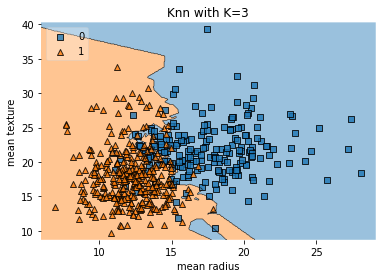

In [19]:
# fitting knn model
k = 3
x = X[['mean radius', 'mean texture']].values
y = y_binary
model = neighbors.KNeighborsClassifier(n_neighbors=k)
model.fit(x, y)

# Plotting decision region
plot_decision_regions(x, y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('Knn with K=' + str(k))
plt.show()

---
## Error Handling and Warnings

You can write better functions if you make use of errors and warnings. Java forces you to catch likely errors via the "throws" designation for a method but there is no such requirement in R or Python.

* Errors are unrecoverable, they halt execution i.e. red lights
* Warnings (under usual execution) do not halt execution, but they display a message, i.e. yellow lights

If you've ever wrote in JavaScript then you know how annoying it is for a program to crash and not know what went wrong. Thankfully for us a lot of Python libraries have helpful error messages. It's great practice to account for errors while writing your own functions.

1. Prevents program from crashing if an error occurs\
If an error occurs in a program, we don’t want the program to unexpectedly crash on the user. Instead, error handling can be used to notify the user of why the error occurred and gracefully exit the process that caused the error.

2. Saves time debugging errors\
Following reason #1, having the program display an error instead of immediately crashing will save a lot of time when debugging errors. The logic inside the error handler can be updated to display useful information for the developer, such as the code trackback, type of error, etc.

3. Helps define requirements for the program\
If the program crashes due to bad input, the error handler could notify the user of why the error occurred and define the requirements and constraints of the program.

We'll discuss exception handling using `try-except` and `try-except-finally`.

If you have a block of code that might fail, you can manage any exceptions by placing this code in a try: … except: … block:

In [20]:
try:
    print("This class is math " + 342)
except TypeError:
    print("Error: can only concatenate str (not int)")

Error: can only concatenate str (not int)


In [21]:
try:
    x = int(input("Please enter a number: "))
    y = 100 / x
except ValueError:
    print("Error: there was an error")
except ZeroDivisionError:
    print("Error: 0 is an invalid number")
except TypeError:
    print("Error: value passed must be integer")
except Exception:
    print("Error: another error occurred")
finally:
    print("This line will always run no matter what. It might be useful to put output a log here.")

Please enter a number: 4
This line will always run no matter what. It might be useful to put output a log here.


1. The statement inside the `try` block is executed.
2. If the statement is successful, both `except` clauses are skipped and the code inside the `finally` clause is run.
3. If the statement inside the `try` block fails, the code in the first `except` statement is executed. If the statement fails due to a `ValueError` (i.e. not being able to convert a non-digit to an int), the code in the `except ValueError` block is run.
4. If the statement inside the `try` block fails and the error is not a `ValueError`, the second `except` statement is checked. If the statement fails due to a `ZeroDivisionError` (i.e. integer is being divided by zero), the code inside the `except ZeroDivisionError` block is run.
5. The `finally` clause will always execute after the last task completes — regardless of whether the last task is in the `try` block or `except` block.

#### Things to keep in mind when handling exceptions:
1. Don’t let the code swallow the exception. We don’t want errors to go undetected by simply ignoring them. If you need to swallow an exception to avoid a fundamental issue, the architecture of the program needs to be re-evaluated.
```
try:
        y = 100 / x
except ZeroDivisionError:
        pass 
```

2. Don’t declare new variables inside a try statement that might not be reached.
```
try:
       y = 100 / x
       z = 23 * y
except ZeroDivisionError:
       pass
print(z) # z will be undeclared if an Exception is raised
```

### Warnings
In the previous demo we used the Boston Housing Data, this is the cell we ran to import the dataset. We add lines 5 and 6 to ignore the warnings, this time let's load the dataset without calling the warning.

In [22]:
# Import sklearn's datasets module
from sklearn import datasets

# Lines below are just to ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

# Load the Boston Housing dataset as bh
bh = datasets.load_boston()

# The Boston dataset is essentially a dictionary, let's check it's keys
bh.keys()

E:\Users\amira\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

What an interesting warning! The warning states that there is an ethical problem with the dataset and that sklearn maintainers discourage the use of it. We ignore the warning because we only need data for practice purposes, still, as a budding data scientist you are accountable for considering the ethical concerns of the data you use.

Read up on the [Boston Housing Dataset Controversy](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8).

## NumPy
NumPy is the fundamental package for scientific computing in Python. It provides a multi-dimensional array object, an assortment of routines for fast operation on arrays such as discrete Fourier transforms, basic linear algebra and statistical operations.

A lot of the source code is optimized in the C language. NumPy brings the computational power of languages like C and Fortran to Python! The library has many use cases in Python and is an essential component in so many other libraries.

In [23]:
# pip install the Numpy Library
!pip install numpy

In [24]:
# importing dependencies
import numpy as np

In [25]:
# Define a single row of values as a numpy array object
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [26]:
# print data type of a
print(type(a))

<class 'numpy.ndarray'>


In [27]:
# print data type of elements in array a
a.dtype

dtype('int32')

In [28]:
# Define another single row of values as a numpy array object
# This time make the first value a float
b = np.array([1.01, 2, 3, 4])
b

array([1.01, 2.  , 3.  , 4.  ])

In [29]:
# print data type of elements in array b
b.dtype

dtype('float64')

All elements in a numpy array must be of the same data type. Now let's define a multidimensional array, that is, we'll nest equal-length arrays inside a super-array.

In [30]:
# Create an array where each element is a 3 element long array
c = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
            ])

c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Matrix Operations

We'll go over some handy matrix operations in python. 

Following are the operations that we are going to perform using the Numpy library:
* Matrix addition
* Matrix subtraction
* Matrix multiplication
* Matrix transpose
* Matrix determinant
* Matrix inverse
* Matrix rank

We'll also go over:
* Slicing of a matrix
* Printing single row or/and column of matrix etc.
* Generating Identity Matrix

In [31]:
# Generating matrix_1
matrix_1 = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]
                    ])
matrix_1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
# Generating matrix_2
matrix_2 = np.array([[1, 2, 3],
                     [0, 5, 6],
                     [0, 0, 9]
                    ])
matrix_2

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [33]:
# Matrix addition
matrix_sum = matrix_1 + matrix_2
matrix_sum

array([[ 2,  4,  6],
       [ 4, 10, 12],
       [ 7,  8, 18]])

In [34]:
# Matrix subtraction
matrix_difference = matrix_1 - matrix_2
matrix_difference

array([[0, 0, 0],
       [4, 0, 0],
       [7, 8, 0]])

For the multiplication of two matrices, we will use the numpy.dot() function. The numpy.dot() function performs dot multiplication between the given two matrices. It handles matrix1 and matrix2 as an array and performs multiplication operations on them.

In [35]:
# Matrix multiplication
matrix_product = matrix_1.dot(matrix_2)
matrix_product

array([[  1,  12,  42],
       [  4,  33,  96],
       [  7,  54, 150]])

In [36]:
# You can also use `@` to multiply to matrices with NumPy
matrix_1 @ matrix_2

array([[  1,  12,  42],
       [  4,  33,  96],
       [  7,  54, 150]])

In [37]:
# Matrix transpose
matrix_product.transpose()

array([[  1,   4,   7],
       [ 12,  33,  54],
       [ 42,  96, 150]])

In [38]:
# Matrix determinant
np.linalg.det(matrix_product)

0.0

In [39]:
# Matrix Inverse
#np.linalg.inv(matrix_product)

In [40]:
# Generating matrix
matrix = np.array([[1, 3],
                   [2, 5],
                 ])
matrix

array([[1, 3],
       [2, 5]])

In [41]:
# Matrix Inverse example 2
np.linalg.inv(matrix)

array([[-5.,  3.],
       [ 2., -1.]])

In [42]:
# Matrix rank
np.linalg.matrix_rank(matrix)

2

**Slicing Elements from Python Matrix without using Numpy**

Now, let’s move to the slicing of the element from a Python matrix. The slicing of elements in the Python matrix is very similar to that of Python array slicing that we have performed above.

To perform the slicing operation on elements of Python matrix, the following syntax should with the matrix:

`matrix_1[row_start:row_end, col_start:col_end]`

In [43]:
# Slice matrix_1
matrix_1[0:2, 0:3]

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
# print the second row
matrix_1[1]

array([4, 5, 6])

In [45]:
# print the last column
matrix_1[:, -1]

array([3, 6, 9])

In [46]:
# generating identity matrix
dimension = int(input("Enter the dimension of identitiy matrix: "))
identity_matrix = np.identity(dimension, dtype="int") #dtype is useful for when doing arithmetic with other matrices
print(identity_matrix)

Enter the dimension of identitiy matrix: 3
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [47]:
# Outputting matrix
matrix

array([[1, 3],
       [2, 5]])

In [48]:
# Inverse of matrix
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-5.,  3.],
       [ 2., -1.]])

In [49]:
# what do I expect to get when I multiply the inverse by the original matrix?
matrix @ matrix_inv

array([[1., 0.],
       [0., 1.]])

## Support Vector Machines SVM

We'll use a few visualizations to drive home the major points.

In [50]:
# Create df
df = pd.DataFrame({'response': [0, 0, 0, 1, 1, 1],
                   'first_feature': [1, 1, 2, 3, 3, 4],
                   'second_feature': [1, 2, 1, 3, 4, 3]})
df

,response,first_feature,second_feature
0,0,1,1
1,0,1,2
2,0,2,1
3,1,3,3
4,1,3,4
5,1,4,3


<AxesSubplot:xlabel='first_feature', ylabel='second_feature'>

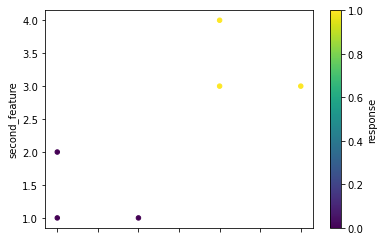

In [51]:
# Lets plot the data using the Pandas plot() function
df.plot(x ='first_feature',
        y='second_feature', 
        kind = 'scatter',
        c = 'response',
        cmap="viridis")

In [52]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

In [53]:
# We'll do the same with matplotlib
import matplotlib.pyplot as plt

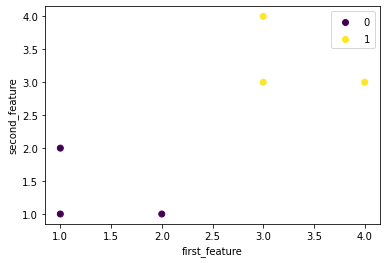

In [54]:
# Output plot
scatter =plt.scatter(x =df['first_feature'],
                     y=df['second_feature'], 
                     c = df['response'],
                    )

# Setting axis labels
plt.xlabel('first_feature')
plt.ylabel('second_feature')

#add legend
plt.legend(*scatter.legend_elements())

# Display plot
plt.show()

Now we fit a linear SVM. Since the data is linearly seperable, we can make $\lambda = 0$. 

In [55]:
# Defining X
X = df.iloc[:, [1, 2]]
X

,first_feature,second_feature
0,1,1
1,1,2
2,2,1
3,3,3
4,3,4
5,4,3


In [56]:
# Defining y
y = df.iloc[:, [0]]
y

,response
0,0
1,0
2,0
3,1
4,1
5,1


In [57]:
#Import svm model
from sklearn import svm

In [58]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [59]:
# fit the data on the response
clf.fit(X, y)

E:\Users\amira\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [60]:
help(clf)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


Now that we've fit the data using the algorithm $\mathcal{A}$ SVM, let's check the weight vector (w-vec).

In [61]:
clf.coef_[0]

array([0.6664, 0.6668])

E:\Users\amira\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

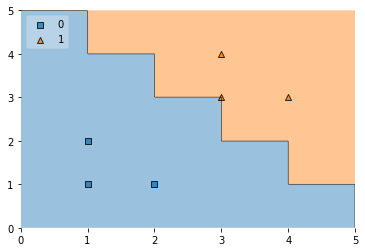

In [62]:
# Plot Decision Region using mlxtend's awesome plotting function
from mlxtend.plotting import plot_decision_regions

X = df[['first_feature', 'second_feature']]
y = df['response']

plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)


In [63]:
help(plot_decision_regions)

Help on function plot_decision_regions in module mlxtend.plotting.decision_regions:

plot_decision_regions(X, y, clf, feature_index=None, filler_feature_values=None, filler_feature_ranges=None, ax=None, X_highlight=None, zoom_factor=1.0, legend=1, hide_spines=True, markers='s^oxv<>', colors='#1f77b4,#ff7f0e,#3ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf', scatter_kwargs=None, contourf_kwargs=None, scatter_highlight_kwargs=None)
    Plot decision regions of a classifier.
    
    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    
    y : array-like, shape

To understand the hyperparameter, let's introduce another data point so the training data is no longer linearly separable.

In [64]:
# Adding row to end of DataFrame
df.loc[len(df.index)] = [0, 3.2, 3.2]
df

,response,first_feature,second_feature
0,0.0,1.0,1.0
1,0.0,1.0,2.0
2,0.0,2.0,1.0
3,1.0,3.0,3.0
4,1.0,3.0,4.0
5,1.0,4.0,3.0
6,0.0,3.2,3.2


E:\Users\amira\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

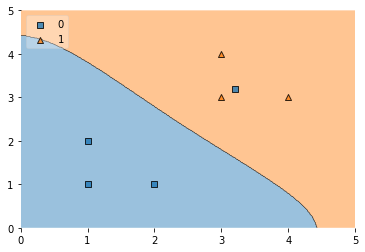

In [65]:
# Lets plot it

# defining D and y
X = df[['first_feature', 'second_feature']]
y = df['response']

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Radial basis function kernel

# fit the data
clf.fit(X, y)

# plotting
plot_decision_regions(X=X.values, 
                      y=y.values.astype(np.int_),
                      clf=clf, 
                      legend=2)

The data is no longer linearly seperable, as we can visualize from the plot. Let's try to build a SVM at a different lambda $\lambda$ value. The SciKit Learn SVC module calls the R "cost" parameter gamma.

E:\Users\amira\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

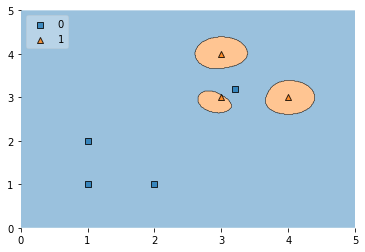

In [66]:
#Create a svm Classifier

# defining constants
lambda_value = 0.01 #0.001 #1.3
n = len(X)

# initializing model
clf = svm.SVC(kernel='rbf', gamma =  (2 * n * lambda_value)**-1) # Radial basis function kernel

# fit the data on the response
clf.fit(X, y)

# plotting
plot_decision_regions(X=X.values, 
                      y=y.values.astype(np.int_),
                      clf=clf, 
                      legend=2)

What lesson did we learn here? This hyperparameter really matters! (In the method's documentation note, it says "Parameters of SVM-models usually must be tuned to yield sensible results!") And it is not clear to me what the "wedge" is anymore when there isn't separability, nor what the support vectors are, and nor how `cost` (or `gamma`) parameter has much to do with the lambda from the notes. What is clear is that we need to figure out a way to deal with selecting the "right" hyperparameter value automatically. So far neither the perceptron nor the SVM is an algorithm for binary classification that comes without flaws.